In [ ]:
# Imports needed
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore') #suppresses warning messages that may appear during

In [ ]:
os.getcwd() # current working directory

'/content'

In [ ]:
##1. Data exploration and understanding

In [ ]:
##1.Load the dataset and display the first 10 rows.
df = pd.read_csv("Assignment1.csv")
# Display the first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

In [ ]:
# 2. Identify the number of rows and columns in the dataset.
rows, cols = df.shape
print(f"\nThe dataset has {rows} rows and {cols} columns.")


The dataset has 143 rows and 9 columns.


In [ ]:
# List all columns and their data types
print("\nColumns and their data types:")
print(df.info())


Columns and their data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   score                         143 non-null    float64
 2   Log GDP per capita            140 non-null    float64
 3   Social support                140 non-null    float64
 4   Healthy life expectancy       140 non-null    float64
 5   Freedom to make life choices  140 non-null    float64
 6   Generosity                    140 non-null    float64
 7   Perceptions of corruption     140 non-null    float64
 8   Dystopia + residual           140 non-null    float64
dtypes: float64(8), object(1)
memory usage: 10.2+ KB
None


In [ ]:
2. ###Basic Statistics

2.0

In [ ]:
## 1. Calculate the mean, median, and standard deviation for the Score column.
# Calculate basic statistics for the Score column
mean_score = df['score'].mean()
median_score = df['score'].median()
std_dev_score = df['score'].std()

print(f"Mean Score: {mean_score}")
print(f"Median Score: {median_score}")
print(f"Standard Deviation of Score: {std_dev_score}")


Mean Score: 5.52758041958042
Median Score: 5.785
Standard Deviation of Score: 1.1707165099442995


In [ ]:
## 2. Identify the country with the highest and lowest happiness scores.
# Identify the country with the highest and lowest happiness scores
highest_score_country = df.loc[df['score'].idxmax()]
lowest_score_country = df.loc[df['score'].idxmin()]

print(f"Country with the highest score:\n{highest_score_country[['Country name', 'score']]}")
print(f"Country with the lowest score:\n{lowest_score_country[['Country name', 'score']]}")


Country with the highest score:
Country name    Finland
score             7.741
Name: 0, dtype: object
Country with the lowest score:
Country name    Afghanistan
score                 1.721
Name: 142, dtype: object


In [ ]:
## MISSING VALUES

In [ ]:
## 1. Check if there are any missing values in the dataset. If so, display the total count for each column.
# Check for missing values
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [ ]:
## Filtering and Sorting:

In [ ]:
## 1.Filter the dataset to show only the countries with a Score greater than 7.5.
# Filter the dataset for countries with a Score greater than 7.5
filtered_df = df[df['score'] > 7.5]

print(f"Countries with a Score greater than 7.5:\n{filtered_df[['Country name', 'score']]}")


Countries with a Score greater than 7.5:
  Country name  score
0      Finland  7.741
1      Denmark  7.583
2      Iceland  7.525


In [ ]:
## 2. 2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top rows
# Sort the filtered dataset by GDP per Capita in descending order and display the top 10 rows
sorted_filtered_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)

print("Top 10 countries with a Score greater than 7.5, sorted by GDP per Capita:")
print(sorted_filtered_df[['Country name', 'score', 'Log GDP per capita']].head(10))


Top 10 countries with a Score greater than 7.5, sorted by GDP per Capita:
  Country name  score  Log GDP per capita
1      Denmark  7.583               1.908
2      Iceland  7.525               1.881
0      Finland  7.741               1.844


In [ ]:
## Adding New Columns:

In [ ]:
## 1. Create a new column called Happiness Category that categorizes countries into three categories based on their score.
# Add a new column for Happiness Category
def categorize_happiness(score):
    if score < 4:
        return "Low"
    elif 4 <= score <= 6:
        return "Medium"
    else:
        return "High"

df['Happiness Category'] = df['score'].apply(categorize_happiness)

print("Happiness Category column added. Sample data:")
print(df[['Country name', 'score', 'Happiness Category']].head())


Happiness Category column added. Sample data:
  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High


In [ ]:
##2. Data visualizations

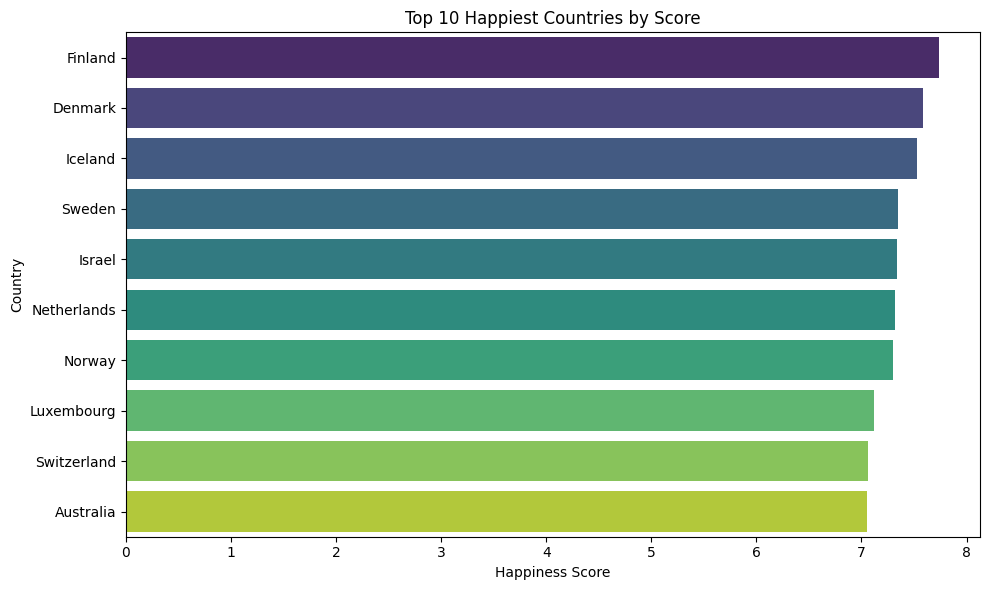

In [ ]:
## 1. Bar Plot: Top 10 Happiest Countries by Score
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 10 happiest countries by score
top_10_happiest = df.nlargest(10, 'score')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_happiest, x='score', y='Country name', palette='viridis')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


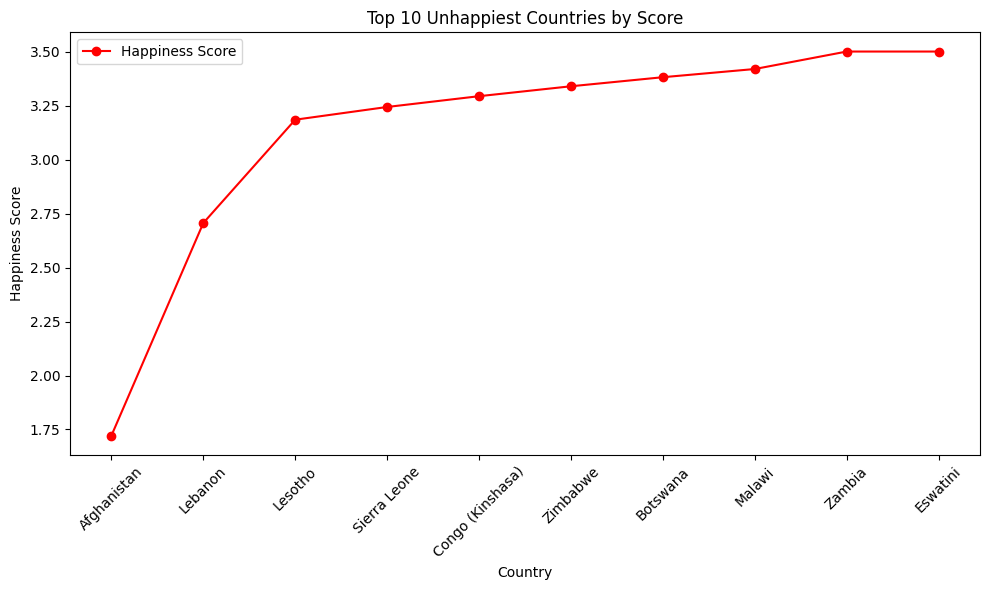

In [ ]:
## 2. Line Plot: Top 10 Unhappiest Countries by Score
# Select the top 10 unhappiest countries by score
top_10_unhappiest = df.nsmallest(10, 'score')

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', color='red', label='Happiness Score')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


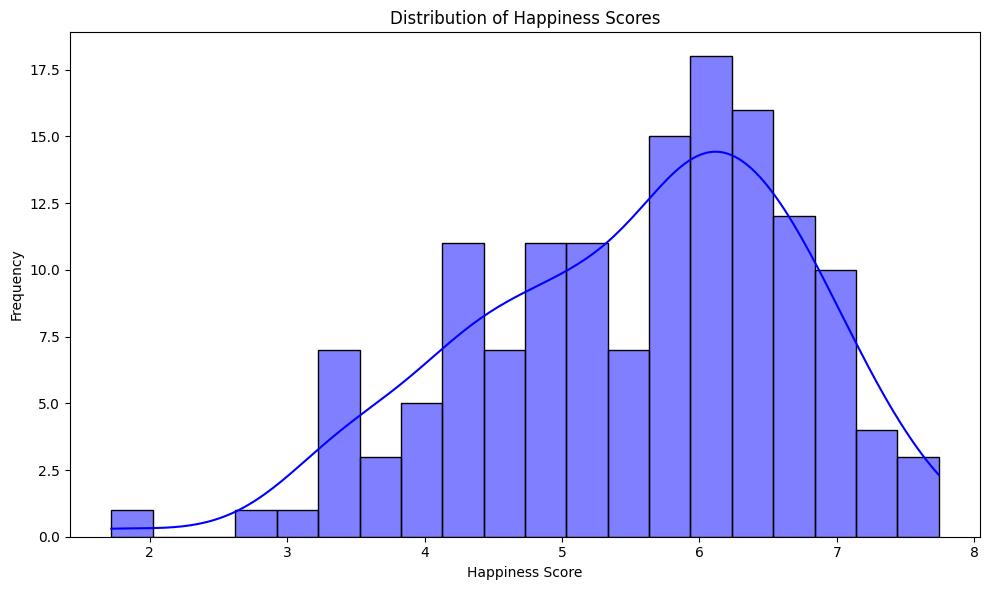

In [ ]:
## 3. Histogram: Distribution of Scores
# Create a histogram for the Score column
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=20, kde=True, color='blue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


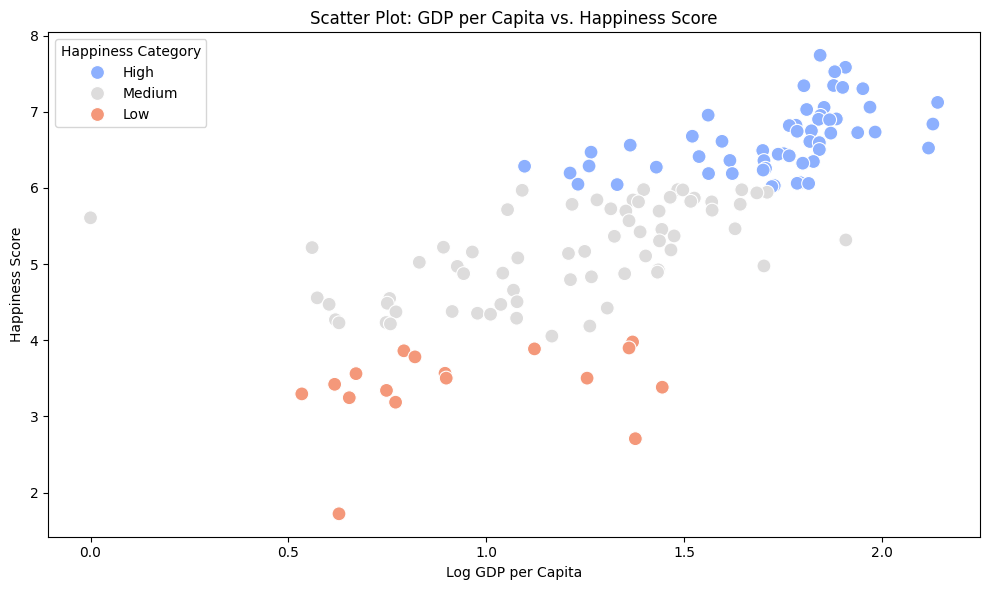

In [ ]:
## 4. Scatter Plot: GDP per Capita vs. Score
# Create a scatter plot for GDP per Capita vs. Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Log GDP per capita', y='score', hue='Happiness Category', palette='coolwarm', s=100)
plt.title('Scatter Plot: GDP per Capita vs. Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Happiness Category')
plt.tight_layout()
plt.show()




In [ ]:
## 3.2 Problem - 2 - Some Advance Data Exploration Task:

In [ ]:
## Task - 1 - Setup Task - Preparing the South-Asia Dataset:

In [ ]:
df = pd.read_csv("Assignment1.csv")

# 1. Define South Asian and Middle Eastern countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# 2. Filter datasets for each region
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

print("Filtered South Asian Dataset:")
print(south_asia_df)

# 3. Save the filtered dataset as a CSV file
south_asia_df.to_csv("South_Asia_Dataset.csv", index=False)
print("South Asian dataset saved as 'South_Asia_Dataset.csv'.")


Filtered South Asian Dataset:
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perc

In [ ]:
## Task - 2 - Composite Score Ranking:

In [ ]:
## Step 1: Create the Composite Score Column
# Calculate the Composite Score
south_asia_df['Composite Score'] = (
    0.40 * south_asia_df['Log GDP per capita'] +
    0.30 * south_asia_df['Social support'] +
    0.30 * south_asia_df['Healthy life expectancy']
)

print("Composite Score column added. Sample data:")
print(south_asia_df[['Country name', 'Composite Score']].head())


Composite Score column added. Sample data:
    Country name  Composite Score
92         Nepal           0.8159
107     Pakistan           0.7039
125        India           0.7874
127    Sri Lanka           1.0739
128   Bangladesh           0.6774


In [ ]:
## Step 2: Rank the South Asian Countries Based on the Composite Score
# Rank South Asian countries by Composite Score in descending order
ranked_south_asia = south_asia_df.sort_values(by='Composite Score', ascending=False)

print("South Asian countries ranked by Composite Score:")
print(ranked_south_asia[['Country name', 'Composite Score', 'score']])


South Asian countries ranked by Composite Score:
    Country name  Composite Score  score
127    Sri Lanka           1.0739  3.898
92         Nepal           0.8159  5.158
125        India           0.7874  4.054
107     Pakistan           0.7039  4.657
128   Bangladesh           0.6774  3.886
142  Afghanistan           0.3238  1.721


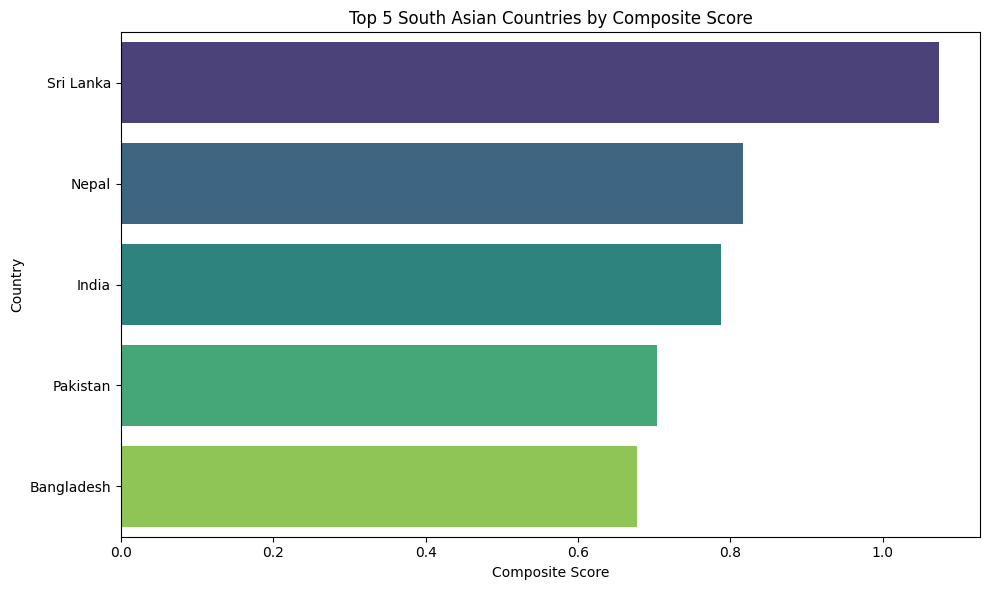

In [ ]:
## Step 3: Visualize the Top 5 Countries Using a Horizontal Bar Chart
# Select the top 5 countries
top_5_composite = ranked_south_asia.head(5)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_composite, x='Composite Score', y='Country name', palette='viridis')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


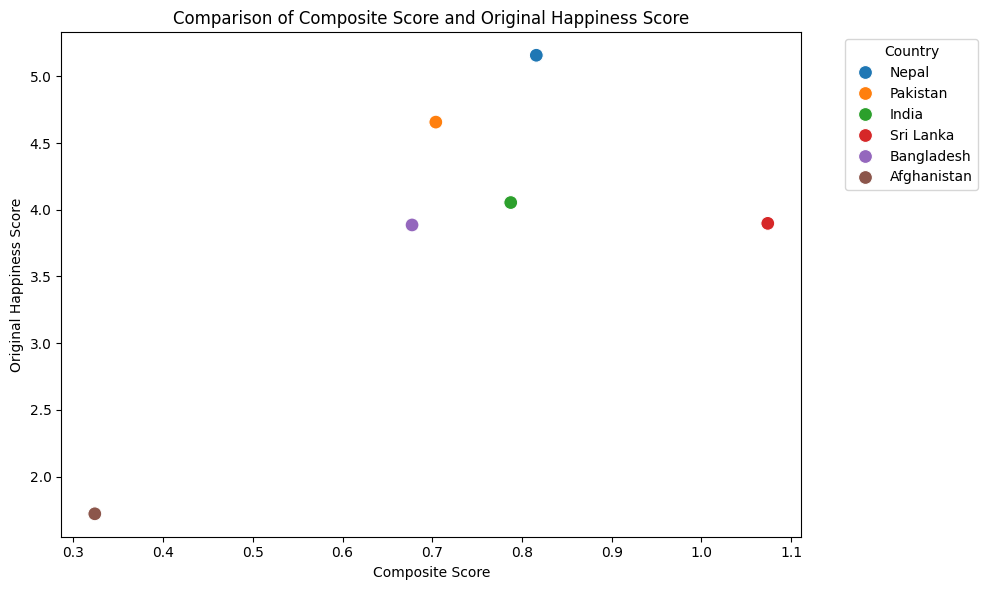

In [ ]:
## Step 4: Compare Rankings Based on Composite Score and Original Score
# Create a scatter plot comparing Composite Score and Original Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=south_asia_df, x='Composite Score', y='score', hue='Country name', palette='tab10', s=100)
plt.title('Comparison of Composite Score and Original Happiness Score')
plt.xlabel('Composite Score')
plt.ylabel('Original Happiness Score')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
##Task - 3 - Outlier Detection:

In [ ]:
## Step 1: Identify Outliers Using the 1.5 × IQR Rule
# Calculate IQR for 'score' and 'Log GDP per capita'
q1_score = south_asia_df['score'].quantile(0.25)
q3_score = south_asia_df['score'].quantile(0.75)
iqr_score = q3_score - q1_score

q1_gdp = south_asia_df['Log GDP per capita'].quantile(0.25)
q3_gdp = south_asia_df['Log GDP per capita'].quantile(0.75)
iqr_gdp = q3_gdp - q1_gdp

# Define lower and upper bounds for outliers
lower_bound_score = q1_score - 1.5 * iqr_score
upper_bound_score = q3_score + 1.5 * iqr_score

lower_bound_gdp = q1_gdp - 1.5 * iqr_gdp
upper_bound_gdp = q3_gdp + 1.5 * iqr_gdp

# Identify outliers for Score and GDP per Capita
outliers = south_asia_df[
    (south_asia_df['score'] < lower_bound_score) | (south_asia_df['score'] > upper_bound_score) |
    (south_asia_df['Log GDP per capita'] < lower_bound_gdp) | (south_asia_df['Log GDP per capita'] > upper_bound_gdp)
]

print("Outlier countries based on Score and GDP per Capita:")
print(outliers[['Country name', 'score', 'Log GDP per capita']])


Outlier countries based on Score and GDP per Capita:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


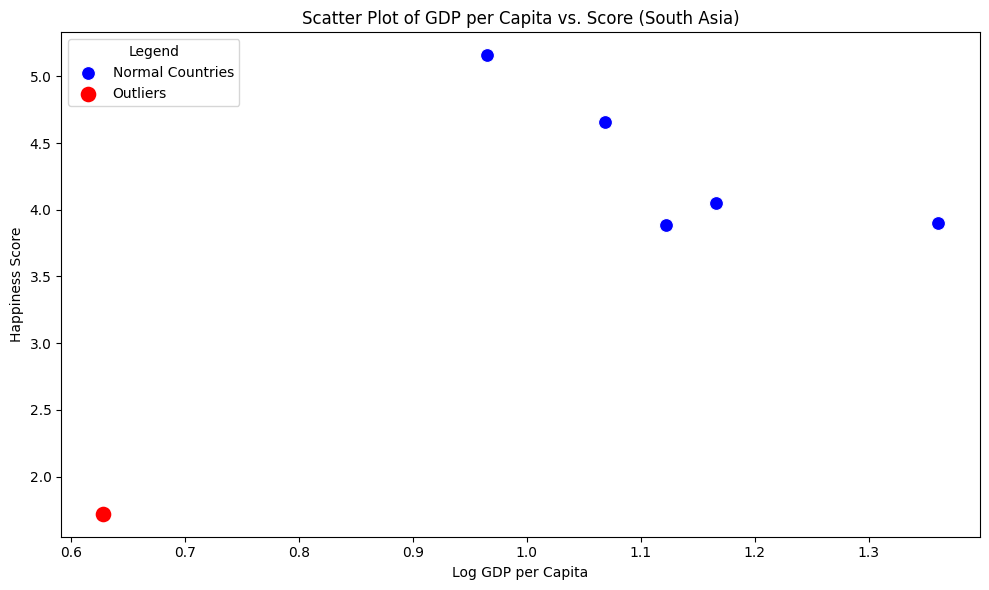

In [ ]:
## Step 2: Scatter Plot Highlighting Outliers
# Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=south_asia_df, x='Log GDP per capita', y='score', label='Normal Countries', color='blue', s=100)

# Highlight outliers
sns.scatterplot(data=outliers, x='Log GDP per capita', y='score', label='Outliers', color='red', s=150)

plt.title('Scatter Plot of GDP per Capita vs. Score (South Asia)')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Legend', loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
## Step 3: Discussion Points

In [ ]:
### Task - 4 - Exploring Trends Across Metrics:


In [ ]:
## Step 1: Calculate the Pearson Correlation for Two Metrics (e.g., Freedom to Make Life Choices and Generosity) with the Happiness Score
# Calculate Pearson correlation between the Score and the two chosen metrics
correlation_freedom = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'])
correlation_generosity = south_asia_df['Generosity'].corr(south_asia_df['score'])

print(f"Pearson correlation between Freedom to Make Life Choices and Score: {correlation_freedom}")
print(f"Pearson correlation between Generosity and Score: {correlation_generosity}")


Pearson correlation between Freedom to Make Life Choices and Score: 0.8005185224163315
Pearson correlation between Generosity and Score: 0.874512371253192


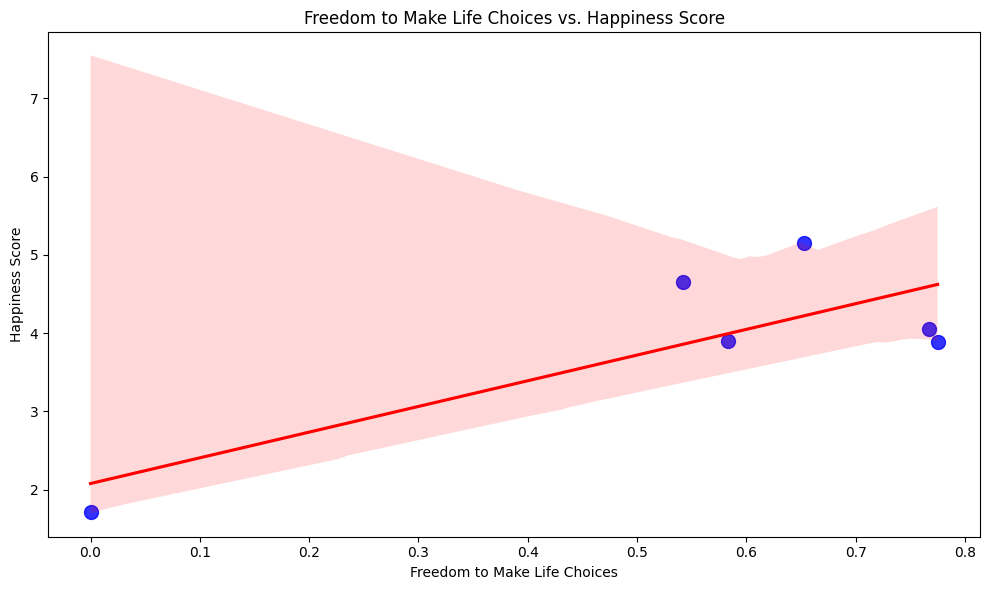

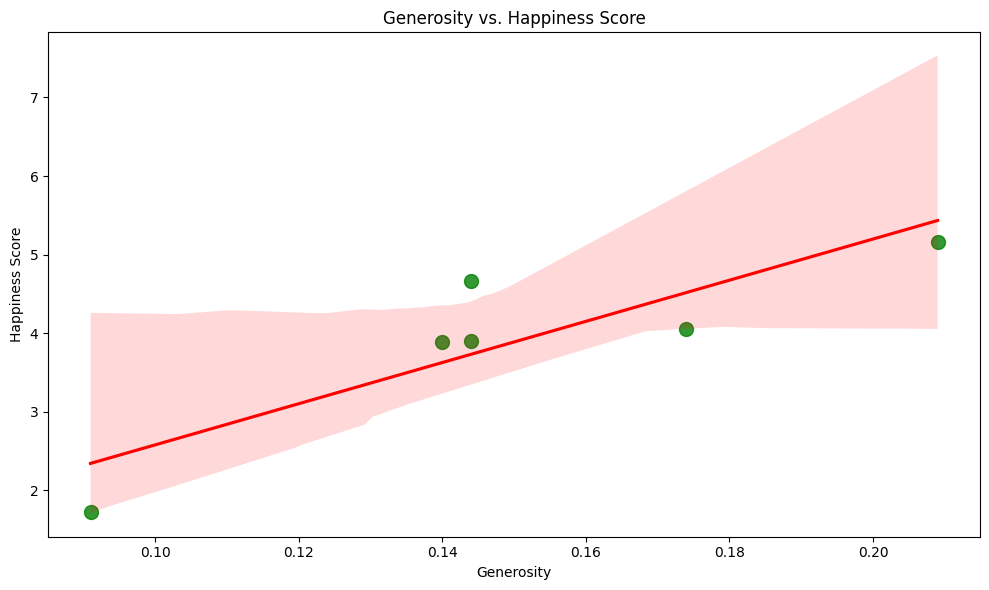

In [ ]:
## Step 2: Create Scatter Plots with Trendlines for These Metrics Against the Score
# Scatter plot for Freedom to Make Life Choices vs. Score
plt.figure(figsize=(10, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df, scatter_kws={'s': 100, 'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Freedom to Make Life Choices vs. Happiness Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

# Scatter plot for Generosity vs. Score
plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity', y='score', data=south_asia_df, scatter_kws={'s': 100, 'color': 'green'}, line_kws={'color': 'red'})
plt.title('Generosity vs. Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()


In [ ]:
# ##Step 3: Discuss the Strongest and Weakest Relationships
# Now, let's analyze the correlations:

# Strongest Relationship: The metric with the higher Pearson correlation with the Score will indicate the strongest relationship. A higher positive correlation means that as the value of the metric increases, so does the happiness score, and vice versa.
# Weakest Relationship: The metric with the lower Pearson correlation will show the weakest relationship. A near-zero or negative correlation suggests that changes in the metric have little or no effect on the happiness score.
# Discussion Points:
# Freedom to Make Life Choices: If this metric shows a strong positive correlation, it would suggest that people in South Asia tend to report higher happiness scores when they feel they have more freedom to make life choices.
# Generosity: If this metric shows a weak correlation, it would suggest that generosity, while important, may not be a significant factor in determining happiness scores in the region.

In [ ]:
# Task - 5 - Gap Analysis:
#TASKS

In [ ]:
## Step 1: Add a New Column, GDP-Score Gap
# Add a new column for GDP-Score Gap
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

# Display the first few rows to verify
print(south_asia_df[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']].head())


    Country name  Log GDP per capita  score  GDP-Score Gap
92         Nepal               0.965  5.158         -4.193
107     Pakistan               1.069  4.657         -3.588
125        India               1.166  4.054         -2.888
127    Sri Lanka               1.361  3.898         -2.537
128   Bangladesh               1.122  3.886         -2.764


In [ ]:
## Step 2: Rank the South Asian Countries by GDP-Score Gap in Both Ascending and Descending Order
# Rank South Asian countries by GDP-Score Gap in ascending order
ranked_gap_ascending = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)

# Rank South Asian countries by GDP-Score Gap in descending order
ranked_gap_descending = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

# Display the rankings
print("Countries ranked by GDP-Score Gap (Ascending):")
print(ranked_gap_ascending[['Country name', 'GDP-Score Gap']])

print("\nCountries ranked by GDP-Score Gap (Descending):")
print(ranked_gap_descending[['Country name', 'GDP-Score Gap']])


Countries ranked by GDP-Score Gap (Ascending):
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093

Countries ranked by GDP-Score Gap (Descending):
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


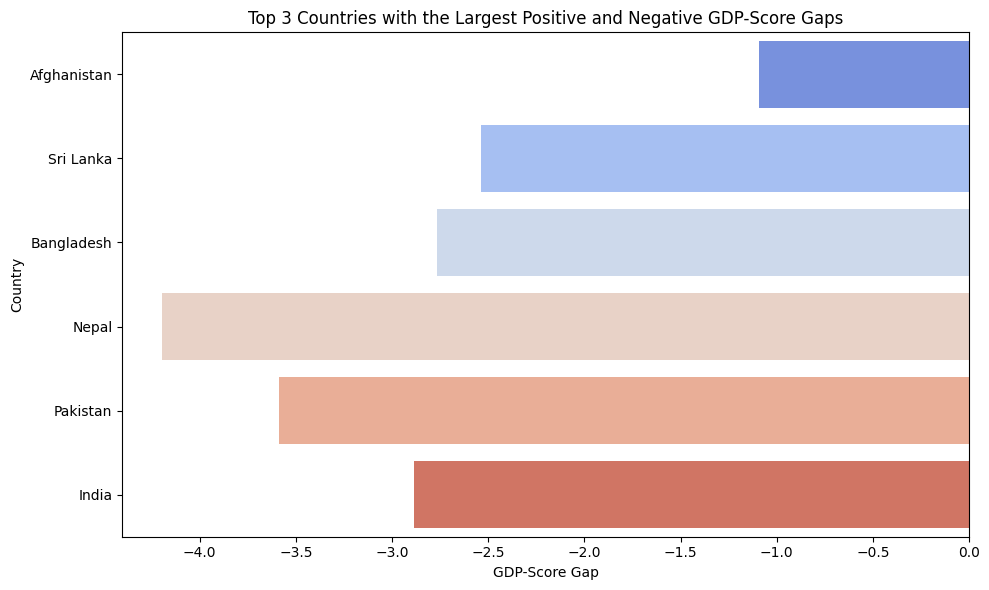

In [ ]:
##Step 3: Highlight the Top 3 Countries with the Largest Positive and Negative Gaps Using a Bar Chart
# Top 3 countries with the largest positive and negative gaps
top_3_positive_gap = ranked_gap_descending.head(3)
top_3_negative_gap = ranked_gap_ascending.head(3)

# Combine both into a single DataFrame for visualization
gap_data = pd.concat([top_3_positive_gap[['Country name', 'GDP-Score Gap']], top_3_negative_gap[['Country name', 'GDP-Score Gap']]])

# Create a bar chart for the top 3 positive and negative gaps
plt.figure(figsize=(10, 6))
sns.barplot(data=gap_data, x='GDP-Score Gap', y='Country name', palette='coolwarm')
plt.title('Top 3 Countries with the Largest Positive and Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


In [ ]:
## Step 4: Analyze the Reasons Behind These Gaps and Their Implications
# Discussion Points:
# Positive Gaps (High GDP, Low Score): Countries with a high GDP per Capita but relatively low Happiness Score may have high economic wealth but still struggle with issues like inequality, political instability, or social unrest. These factors could lower the overall well-being of the population, despite economic growth.
# Negative Gaps (Low GDP, High Score): Countries with a low GDP per Capita but a relatively high Happiness Score may have strong social support systems, a focus on community well-being, or other non-economic factors contributing to happiness, such as social cohesion, education, or healthcare.
# The GDP-Score Gap provides insights into how economic wealth does not always correlate directly with happiness and can reveal social or structural issues that need addressing.

In [ ]:
## 3.3 Problem - 3 - Comparative Analysis:
## Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
# List of Middle Eastern countries
middle_eastern_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter the dataset for Middle Eastern countries
middle_east_df = df[df['Country name'].isin(middle_eastern_countries)]

print("Filtered Middle Eastern Dataset:")
print(middle_east_df[['Country name', 'score']].head())


Filtered Middle Eastern Dataset:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733
27          Saudi Arabia  6.594
61               Bahrain  5.959


In [ ]:
## Task 1.1: Descriptive Statistics
# Calculate the mean and standard deviation for South Asia
south_asia_mean = south_asia_df['score'].mean()
south_asia_std_dev = south_asia_df['score'].std()

# Calculate the mean and standard deviation for the Middle East
middle_east_mean = middle_east_df['score'].mean()
middle_east_std_dev = middle_east_df['score'].std()

print(f"South Asia - Mean Score: {south_asia_mean}, Standard Deviation: {south_asia_std_dev}")
print(f"Middle East - Mean Score: {middle_east_mean}, Standard Deviation: {middle_east_std_dev}")


South Asia - Mean Score: 3.895666666666667, Standard Deviation: 1.1770690152521504
Middle East - Mean Score: 5.412100000000001, Standard Deviation: 1.5662011684327144


In [ ]:
# Which region has higher happiness scores on average?
# This can be inferred by comparing the mean scores for both regions. We can discuss which region has higher scores based on the output of the above calculations.

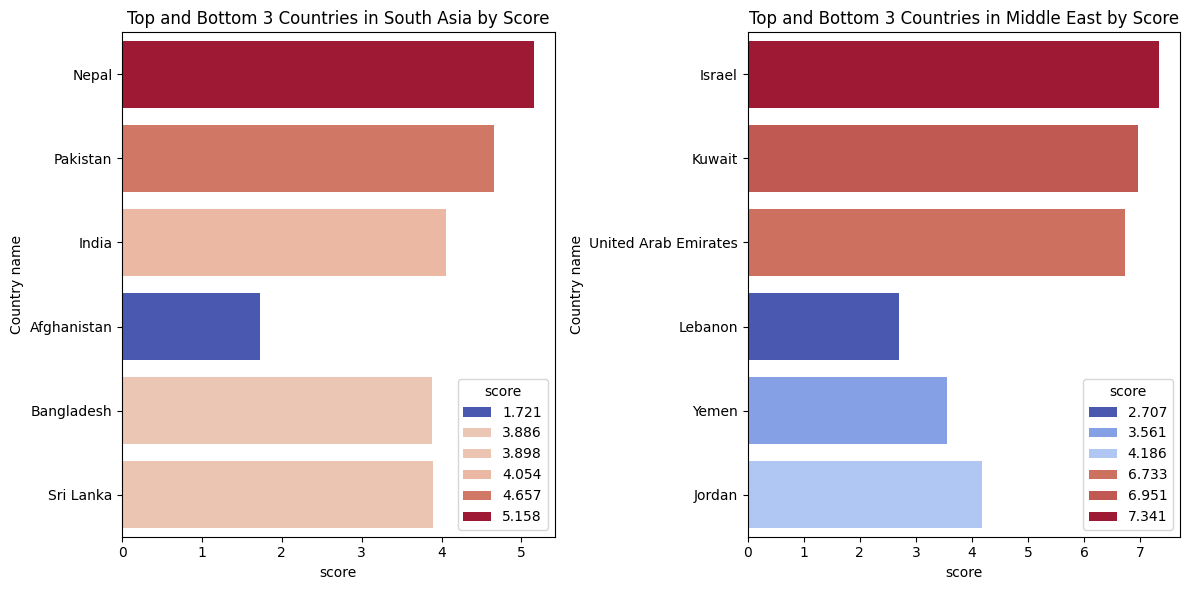

In [ ]:
## Task 1.2: Top and Bottom Performers
# Top 3 countries in South Asia based on score
top_3_south_asia = south_asia_df.nlargest(3, 'score')

# Bottom 3 countries in South Asia based on score
bottom_3_south_asia = south_asia_df.nsmallest(3, 'score')

# Top 3 countries in the Middle East based on score
top_3_middle_east = middle_east_df.nlargest(3, 'score')

# Bottom 3 countries in the Middle East based on score
bottom_3_middle_east = middle_east_df.nsmallest(3, 'score')

# Create bar charts comparing the top and bottom performers for both regions
plt.figure(figsize=(12, 6))

# Plot for South Asia
plt.subplot(1, 2, 1)
sns.barplot(data=pd.concat([top_3_south_asia[['Country name', 'score']], bottom_3_south_asia[['Country name', 'score']]]),
            x='score', y='Country name', hue='score', palette='coolwarm')
plt.title('Top and Bottom 3 Countries in South Asia by Score')

# Plot for Middle East
plt.subplot(1, 2, 2)
sns.barplot(data=pd.concat([top_3_middle_east[['Country name', 'score']], bottom_3_middle_east[['Country name', 'score']]]),
            x='score', y='Country name', hue='score', palette='coolwarm')
plt.title('Top and Bottom 3 Countries in Middle East by Score')

plt.tight_layout()
plt.show()


In [ ]:
## 3. Metric Comparisons

# Check the data types of the columns in the South Asia and Middle East datasets
print(south_asia_df.dtypes)
print(middle_east_df.dtypes)

# Convert relevant columns to numeric (if they aren't already)
south_asia_df[['Log GDP per capita', 'Social support', 'Healthy life expectancy']] = \
    south_asia_df[['Log GDP per capita', 'Social support', 'Healthy life expectancy']].apply(pd.to_numeric, errors='coerce')

middle_east_df[['Log GDP per capita', 'Social support', 'Healthy life expectancy']] = \
    middle_east_df[['Log GDP per capita', 'Social support', 'Healthy life expectancy']].apply(pd.to_numeric, errors='coerce')

# Recalculate the mean of the key metrics
south_asia_metrics = south_asia_df[['Log GDP per capita', 'Social support', 'Healthy life expectancy']].mean()
middle_east_metrics = middle_east_df[['Log GDP per capita', 'Social support', 'Healthy life expectancy']].mean()

print(south_asia_metrics)
print(middle_east_metrics)


Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
Composite Score                 float64
GDP-Score Gap                   float64
dtype: object
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object
Log GDP per capita         1.051833
Social support             0.611833
Healthy life expectancy    0.420333
dtype: float64
Log GDP per capita         1.496333
Social suppor

In [ ]:
## 4: Happiness Disparity

# Compute range (max - min) for South Asia and Middle East
south_asia_range = south_asia_df['score'].max() - south_asia_df['score'].min()
middle_east_range = middle_east_df['score'].max() - middle_east_df['score'].min()

# Compute Coefficient of Variation (CV) for South Asia and Middle East
south_asia_cv = south_asia_std_dev / south_asia_mean
middle_east_cv = middle_east_std_dev / middle_east_mean

print(f"South Asia - Range: {south_asia_range}, CV: {south_asia_cv}")
print(f"Middle East - Range: {middle_east_range}, CV: {middle_east_cv}")


South Asia - Range: 3.4370000000000003, CV: 0.3021482883337427
Middle East - Range: 4.634, CV: 0.28938880812119405


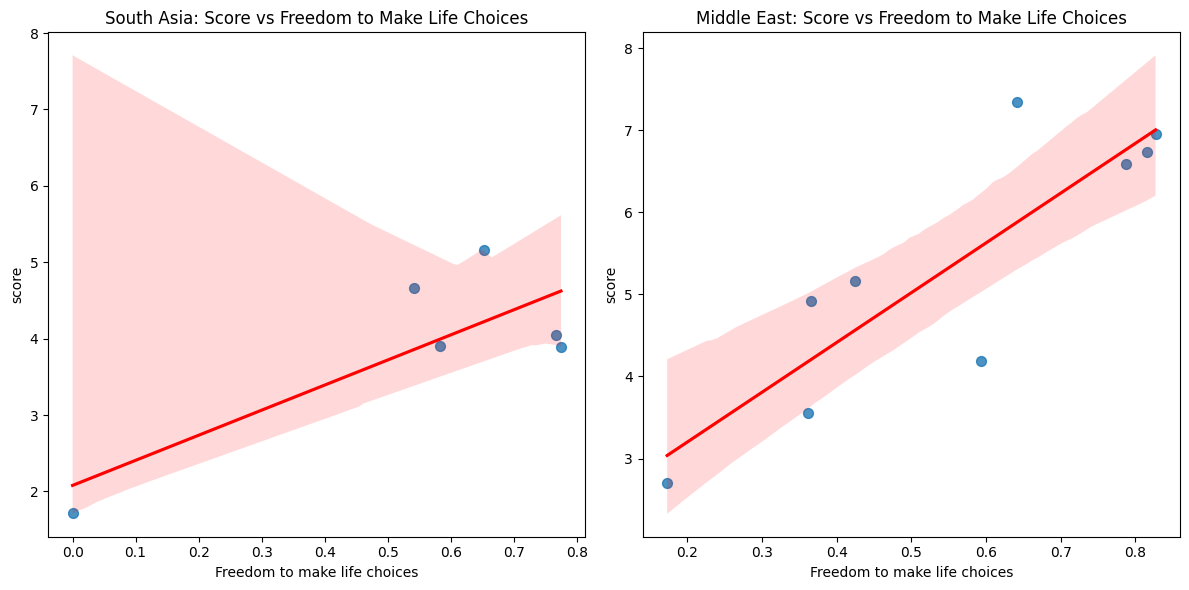

In [ ]:
## 5: Correlation Analysis

# Correlation for South Asia
south_asia_corr = south_asia_df[['score', 'Freedom to make life choices', 'Generosity']].corr()

# Correlation for Middle East
middle_east_corr = middle_east_df[['score', 'Freedom to make life choices', 'Generosity']].corr()

# Plot scatter plots with trendlines
plt.figure(figsize=(12, 6))

# Scatter plot for South Asia: Score vs Freedom to Make Life Choices
plt.subplot(1, 2, 1)
sns.regplot(data=south_asia_df, x='Freedom to make life choices', y='score', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('South Asia: Score vs Freedom to Make Life Choices')

# Scatter plot for Middle East: Score vs Freedom to Make Life Choices
plt.subplot(1, 2, 2)
sns.regplot(data=middle_east_df, x='Freedom to make life choices', y='score', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Middle East: Score vs Freedom to Make Life Choices')

plt.tight_layout()
plt.show()


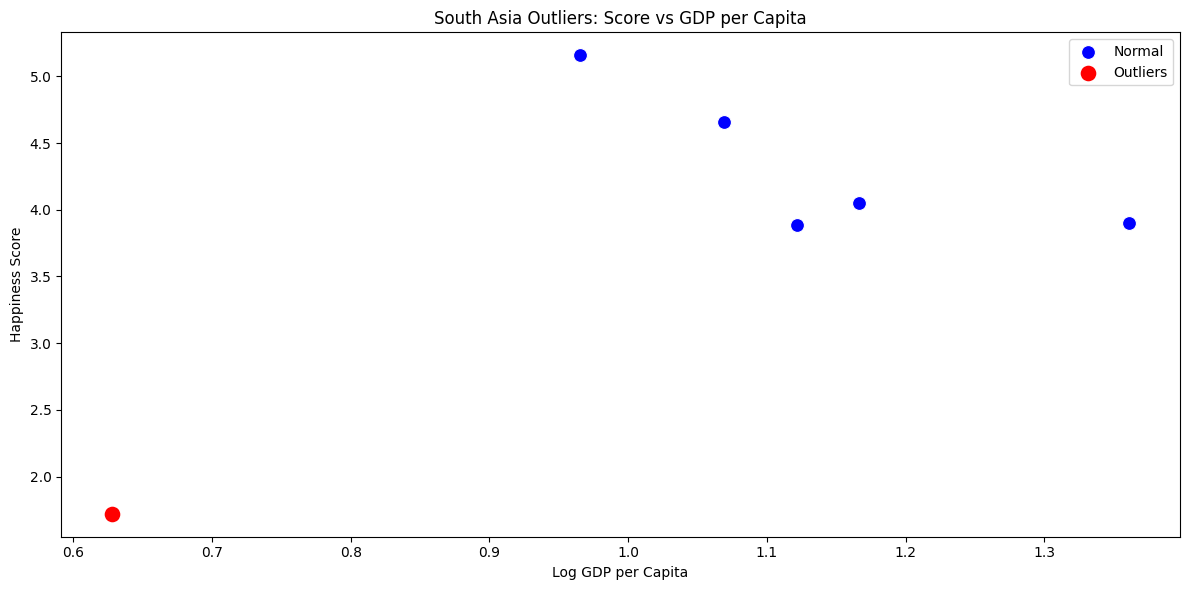

In [ ]:
## 6: Outlier Detection

# Calculate IQR for Score and GDP per Capita for both regions
south_asia_iqr_score = south_asia_df['score'].quantile(0.75) - south_asia_df['score'].quantile(0.25)
middle_east_iqr_score = middle_east_df['score'].quantile(0.75) - middle_east_df['score'].quantile(0.25)

# Define the bounds for outliers based on the 1.5 × IQR rule
south_asia_lower_score = south_asia_df['score'].quantile(0.25) - 1.5 * south_asia_iqr_score
south_asia_upper_score = south_asia_df['score'].quantile(0.75) + 1.5 * south_asia_iqr_score

middle_east_lower_score = middle_east_df['score'].quantile(0.25) - 1.5 * middle_east_iqr_score
middle_east_upper_score = middle_east_df['score'].quantile(0.75) + 1.5 * middle_east_iqr_score

# Identify outliers for Score and GDP per Capita in both regions
south_asia_outliers = south_asia_df[
    (south_asia_df['score'] < south_asia_lower_score) | (south_asia_df['score'] > south_asia_upper_score)
]

middle_east_outliers = middle_east_df[
    (middle_east_df['score'] < middle_east_lower_score) | (middle_east_df['score'] > middle_east_upper_score)
]

# Plot these outliers
plt.figure(figsize=(12, 6))
sns.scatterplot(data=south_asia_df, x='Log GDP per capita', y='score', label='Normal', color='blue', s=100)
sns.scatterplot(data=south_asia_outliers, x='Log GDP per capita', y='score', label='Outliers', color='red', s=150)

plt.title('South Asia Outliers: Score vs GDP per Capita')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.tight_layout()
plt.show()


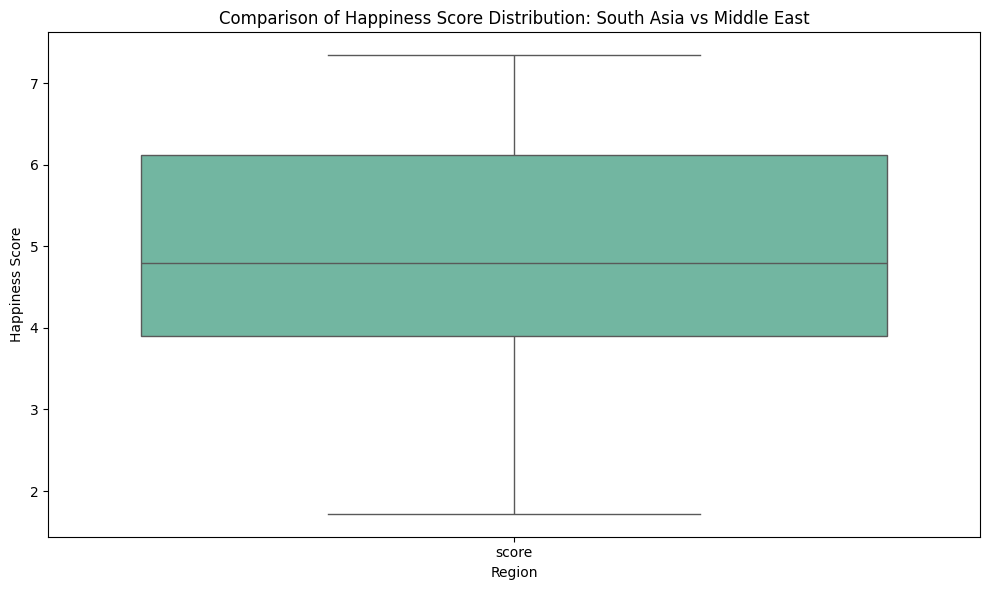

In [ ]:
## 7: Boxplots for Happiness Distribution

# Create boxplots comparing the Score distribution between South Asia and Middle East
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.concat([south_asia_df[['score']], middle_east_df[['score']]]),
            palette='Set2')
plt.title('Comparison of Happiness Score Distribution: South Asia vs Middle East')
plt.ylabel('Happiness Score')
plt.xlabel('Region')
plt.tight_layout()
plt.show()
